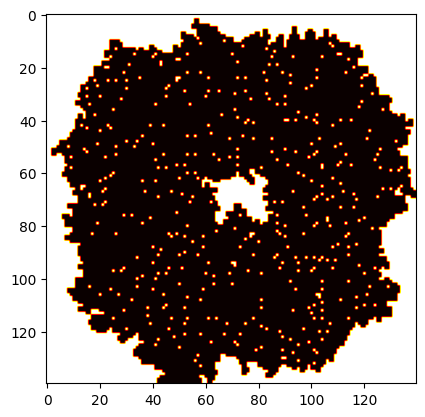

In [217]:
import matplotlib.pyplot as plt
import numpy as np

text = open("input.txt").read().split("\n")
text = [list(x) for x in text]
easy_grid = {}
for i, row in enumerate(text):
    for j, column in enumerate(row):
        if column == 'S':
            start_pos = (i, j)
        easy_grid[(i, j)] = column

allowed_directions = {
    'S': [(1, 0), (-1, 0), (0, 1), (0, -1)],
    'L': [(-1, 0), (0, 1)],
    'F': [(1, 0), (0, 1)],
    '7': [(1, 0), (0, -1)],
    'J': [(-1, 0), (0, -1)],
    '|': [(1, 0), (-1, 0)],
    '-': [(0, -1), (0, 1)],
    '.': []
}

def add(position, direction):
    return (position[0] + direction[0], position[1] + direction[1])

def check_inverse(element, check):
    for direction in allowed_directions[element]:
        if direction[0] == -1 * check[0] and direction[1] == -1 * check[1]:
            return True
    return False

def traverse_from_start():
    def traverse(position, s_direction):
        stack = [(position, s_direction)]
        loop = [start_pos]
        while len(stack) > 0:
            curr_position, o_direction = stack.pop()
            loop.append(curr_position)
            if curr_position not in easy_grid:
                loop.pop()
                continue
            current_element = easy_grid[curr_position]
            if not check_inverse(current_element, o_direction):
                loop.pop()
                continue
            if current_element == 'S':
                return loop
            allowed_direction = allowed_directions[current_element]
            for direction in allowed_direction:
                if direction[0] + o_direction[0] != 0 or direction[1] + o_direction[1] != 0:
                    stack.append((add(curr_position, direction), direction))
        return False


    for direction in allowed_directions['S']:
        loop = traverse(add(start_pos, direction), direction)
        if loop:
            break
    return loop

loop = traverse_from_start()
loop_grid = [[100 for _ in y] for y in text]
for i, coord in enumerate(loop):
    loop_grid[coord[0]][coord[1]] = 25
loop_array = np.array(loop_grid)

plt.imshow(loop_array, cmap='hot')

433


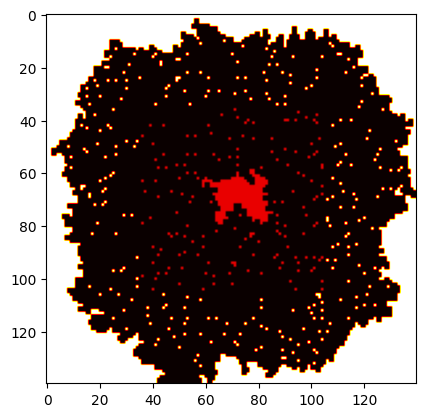

In [218]:
loop_text_grid = [[text[j][i] if (j, i) in loop else "." for i, x in enumerate(y)] for j, y in enumerate(text)]
easy_loop_grid = {}
for i, row in enumerate(loop_text_grid):
    for j, column in enumerate(row):
        easy_loop_grid[(i, j)] = column

def check_in_loop(coord):
    test = coord
    intersect = 0
    last = ""
    limit = loop_array.shape[1] - 1
    while test[1] < limit:
        test[1] += 1
        if(easy_loop_grid[tuple(test)] == '-'):
            continue
        elif(easy_loop_grid[tuple(test)] == '|'):
            intersect += 1
        elif(easy_loop_grid[tuple(test)] != "."):
            if last:
                if last == 'F':
                    if easy_loop_grid[tuple(test)] == '7':
                        intersect += 2
                    elif easy_loop_grid[tuple(test)] == 'J':
                        intersect += 1
                elif last == '7':
                    if easy_loop_grid[tuple(test)] == 'F':
                        intersect += 2
                    elif easy_loop_grid[tuple(test)] == 'L':
                        intersect += 1
                elif last == 'L':
                    if easy_loop_grid[tuple(test)] == '7':
                        intersect += 1
                elif last == 'J':
                    if easy_loop_grid[tuple(test)] == 'F':
                        intersect += 1
                last = ""
            else:
                last = easy_loop_grid[tuple(test)]
    return intersect

count = 0
for i, row in enumerate(loop_text_grid):
    for j, column in enumerate(row):
        if column == '.':
            if check_in_loop([i, j]) % 2 == 1:
                loop_grid[i][j] = 50
                count += 1
loop_array = np.array(loop_grid)
plt.imshow(loop_array, cmap='hot')
print(count)